In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.spatial.distance import pdist
import pylab
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [2]:
raw_df=pd.read_csv('all_annotated.csv')

# filter out rows with median < 0
raw_df['median'] = raw_df.median(axis=1)
filter_data=raw_df.loc[raw_df['median']>0]
filter_data=filter_data.drop(['median'],axis=1)

# log2(data+0.1) transform
log_data=filter_data[filter_data.columns[2:18]]+0.1
log_data=log_data.apply(np.log2)

left=filter_data[filter_data.columns[0:2]]
df=left.join(log_data)


In [3]:
raw_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [4]:
# compute pairwise distance
data_mat=log_data.values
r_pdist=pdist(data_mat)
c_pdist=pdist(np.transpose(data_mat))

# hierarchical clustering
Z_row=linkage(r_pdist, 'ward')
Z_col=linkage(c_pdist, 'ward')

In [5]:
r_order=leaves_list(Z_row)
c_order=leaves_list(Z_col)

In [6]:
clustered_data = log_data.iloc[np.array(r_order),np.array(c_order)]
left_clustered = left.iloc[np.array(r_order)]
clusters = left_clustered.join(clustered_data)
clusters

,t_name,gene_name,male_12,female_12,male_10,female_10,male_11,female_11,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_14A,female_14A,male_13,female_13
16945,FBtr0088035,Ef1alpha48D,12.934721,12.686953,12.670183,12.722926,12.813750,12.867688,12.968766,13.162684,13.063854,13.033016,12.898895,12.985335,12.928335,12.983538,12.856987,12.944601
21487,FBtr0100231,RpL41,12.433014,12.414387,12.250214,12.211794,11.247904,11.888512,13.315899,12.670927,12.957029,13.035814,12.852893,12.443481,12.830904,12.911454,12.560846,12.979426
918,FBtr0081639,alphaTub84B,10.722029,10.333407,10.329504,10.526979,10.934465,10.737289,11.855659,11.754094,11.984685,11.652179,11.681140,11.661965,11.067607,11.193248,10.743815,10.840464
11518,FBtr0076032,RpL10Ab,10.795758,10.517779,10.417125,10.417446,10.493041,10.918809,11.800301,11.606854,11.672828,11.483158,11.906460,11.543012,11.390469,11.637179,10.674436,11.092437
7492,FBtr0089422,RpS7,10.786691,10.476903,10.385360,10.580815,10.947841,11.164172,11.484327,11.452426,11.483044,11.189940,11.826114,11.616858,11.239565,11.213128,10.646758,11.211013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,FBtr0085250,mino,4.676290,4.173244,4.368432,3.578029,3.734366,4.998784,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,1.584866,1.022778,0.858330,2.414056,-3.321928
18077,FBtr0087363,CG11807,5.112638,1.759061,2.571355,3.288537,3.362584,4.735950,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,3.239246,4.323013,3.078899,5.398089,-3.321928
6358,FBtr0301469,LpR1,2.689639,2.323187,2.134276,3.084756,-3.321928,2.179521,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,2.819882,3.669078,1.169102,1.832952,-3.321928
14117,FBtr0078350,Aef1,3.914116,1.805650,1.946598,1.848539,1.025071,3.557844,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,0.060088,2.055140,1.146803,-0.130872,-3.321928


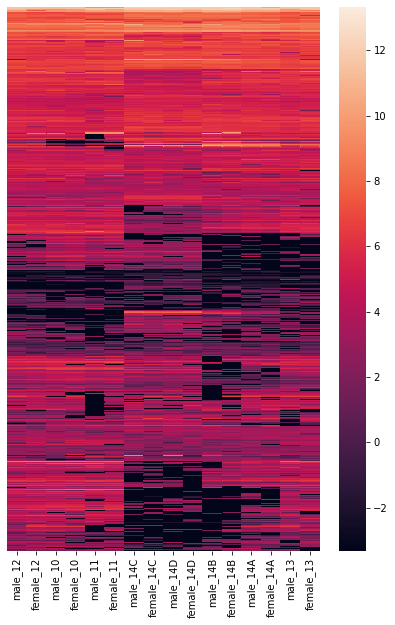

In [7]:
# plot heatmap
import seaborn as sns
# omitting labels for gene names (way too many)
sample_label=clustered_data.columns.tolist()

f, ax = plt.subplots(figsize=(7, 10))
ax = sns.heatmap(clustered_data.to_numpy(),xticklabels=sample_label,yticklabels=False)

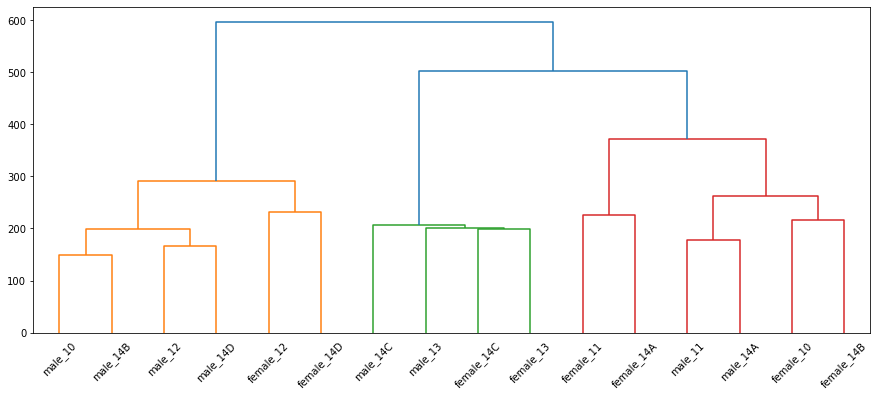

In [8]:
# plot dendrogram for samples

fig = plt.figure(figsize=(15, 6))
dn_c=dendrogram(Z_col,labels=sample_label,leaf_font_size=10, leaf_rotation=45)
plt.show()

In [9]:
# Differential expression
pval_fm=[]
gene_list_fm=[]
pval=[]
gene_list=[]

beta=[]

stages=[10, 11, 12, 13, 14, 14, 14, 14]
for i in range(0,8612):
    male=[log_data.iloc[i,0], log_data.iloc[i,1], log_data.iloc[i,2], log_data.iloc[i,3],
         log_data.iloc[i,4], log_data.iloc[i,5], log_data.iloc[i,6], log_data.iloc[i,7]]
    female=[log_data.iloc[i,8], log_data.iloc[i,9], log_data.iloc[i,10], log_data.iloc[i,11],
           log_data.iloc[i,12], log_data.iloc[i,13], log_data.iloc[i,14], log_data.iloc[i,15]]
    sex=[0]*8+[1]*8 # introduce sex as a future covariate
    # test if each gene is diff. expressed by stages (mixed sex)
    
    gene_exp_fm=male+female
    stages_fm=stages+stages
        
    model1_df = pd.DataFrame({'x':stages_fm, 'y':gene_exp_fm})
    model2_df = pd.DataFrame({'x':stages_fm, 'y':gene_exp_fm, 'sex':sex})
    
    gene_list.append(df.iloc[i]['gene_name'])
    
    olsmodel_fm = smf.ols('y ~ x + 1', data=model1_df)
    results_fm = olsmodel_fm.fit()
    pval_fm.append(results_fm.pvalues[1])
    
    
    olsmodel = smf.ols('y ~ x + sex + 1', data=model2_df)
    results = olsmodel.fit()
    pval.append(results.pvalues[1])
    beta.append(results.params[1])
    
    
    

((array([8.04829641e-05, 1.95358650e-04, 3.11470775e-04, ...,
         9.99688529e-01, 9.99804641e-01, 9.99919517e-01]),
  array([3.66263773e-05, 4.64159493e-04, 8.89027461e-04, ...,
         3.18616660e+01, 3.24272882e+01, 3.24272882e+01])),
 (11.520649464119307, -1.939051213816013, 0.8982800147488982))

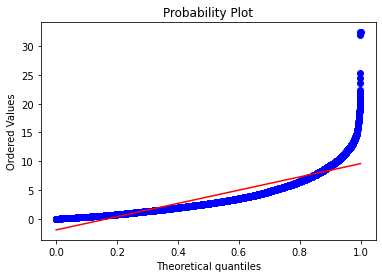

In [10]:
# QQ plot with mixed gender
log_p_fm=-1*np.log(pval_fm)

stats.probplot(log_p_fm, dist="uniform", plot=pylab)

In [11]:
# apply FDR
fdr_fm_corrected=sm.stats.multitest.multipletests(pval_fm, alpha=0.1, method='fdr_bh', 
                                             is_sorted=False, returnsorted=False)[0]

fdr_corrected=sm.stats.multitest.multipletests(pval, alpha=0.1, method='fdr_bh', 
                                          is_sorted=False, returnsorted=False)[0]



In [27]:
# differentially expressed genes based on mixed sex model
goi_fm=[]
for name, boo in zip(gene_list, fdr_fm_corrected):
    if boo:
        goi_fm.append(name)

print(goi_fm)

['Tim17b', 'CG41128', 'CG12581', 'CG14641', 'abs', 'Vps24', 'CG9776', 'hkb', 'CG11739', 'CG11739', 'CG9855', 'CG9855', 'CG14647', 'lost', 'srl', 'eIF3-S10', 'CG31523', 'CG31523', 'CG14651', 'Fip1', 'CG9775', 'CG9775', 'rpk', 'CG9769', 'tacc', 'atms', 'Hus1-like', 'Gnf1', 'corto', 'CG12163', 'CG12173', 'Hph', 'Hph', 'Hph', 'CR45033', 'Prosbeta7', 'Prosbeta7', 'RpII18', 'CG14667', 'PEK', 'Snr1', 'Hdac3', 'CG45100', 'ksr', 'ksr', 'ksr', 'CG31550', 'CG2519', 'Pcmt', 'Snm1', 'rev7', 'noi', 'kra', 'Atu', 'CG2911', 'RpL13A', 'snoRNA:Me28S-U2134a', 'CG31551', 'CG31549', 'CG31546', 'CG31548', 'MED27', 'Rab23', 'CG2100', 'CG2100', 'Madm', 'CG2091', 'CG2051', 'Rpn5', 'CG1218', 'CG10979', 'CG10979', 'Hpr1', 'CG2023', 'CG2023', 'SmD2', 'CG18048', 'CG42724', 'CG42724', 'TfIIFalpha', 'Dmtn', 'CG1307', 'zen2', 'zen2', 'zen', 'bcd', 'bcd', 'CR45593', 'CR44930', 'ftz', 'CR44931', 'CR45559', 'CG1943', 'Ref1', 'Dpck', 'alphaTub84B', 'CG10068', 'MAGE', 'CG10055', 'CG1234', 'CG10053', 'CG10053', 'CG1142', '

In [28]:
# differentially expressed genes including sex as covariate
goi=[]
for name, boo in zip(gene_list, fdr_corrected):
    if boo:
        goi.append(name)

print(goi)

['Tim17b', 'CG41128', 'CG12581', 'CG14641', 'abs', 'Vps24', 'CG9776', 'hkb', 'CG11739', 'CG11739', 'CG9855', 'CG9855', 'CG14647', 'lost', 'srl', 'eIF3-S10', 'CG31523', 'CG31523', 'CG14651', 'Fip1', 'CG9775', 'CG9775', 'rpk', 'CG9769', 'tacc', 'atms', 'Hus1-like', 'Gnf1', 'corto', 'CG12163', 'CG12173', 'Hph', 'Hph', 'Hph', 'CR45033', 'Prosbeta7', 'Prosbeta7', 'RpII18', 'CG14667', 'PEK', 'Snr1', 'Hdac3', 'CG45100', 'ksr', 'ksr', 'ksr', 'CG31550', 'Pcmt', 'Snm1', 'rev7', 'noi', 'kra', 'Atu', 'CG2911', 'RpL13A', 'snoRNA:Me28S-U2134a', 'CG31551', 'CG31549', 'CG31546', 'CG31548', 'MED27', 'Rab23', 'CG2100', 'CG2100', 'Madm', 'CG2091', 'CG2051', 'Rpn5', 'CG1218', 'CG10979', 'CG10979', 'Hpr1', 'CG2023', 'CG2023', 'SmD2', 'CG18048', 'CG42724', 'CG42724', 'TfIIFalpha', 'CG1307', 'zen2', 'zen2', 'zen', 'bcd', 'bcd', 'CR45593', 'CR44930', 'ftz', 'CR44931', 'CR45559', 'CG1943', 'Ref1', 'Dpck', 'alphaTub84B', 'CG10068', 'MAGE', 'CG10055', 'CG1234', 'CG10053', 'CG10053', 'CG1142', 'scaRNA:MeU5-C46', 

In [32]:
# find common genes from two lists (model: mixed sex & sex as a covariate)

# print(list(set(goi_fm).intersection(goi)))
overlap_genes=list(set(goi_fm).intersection(goi))
print('There are', len(overlap_genes), 'common genes')
# Percentage overlap
per_overlap=len(overlap_genes) / len(goi_fm) * 100
print('Percentage overlap is', per_overlap)

There are 2832 common genes
Percentage overlap is 74.70324452651016
